In [2]:
%%capture
!pip install streamlit
!pip install ta

In [1]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
#import tensorflow as tf
from ta.volatility import BollingerBands
from ta.trend import MACD,sma_indicator
from ta.momentum import RSIIndicator
import datetime


option = st.sidebar.selectbox('Select one symbol', ( 'Bitcoin','Etherium','Litecoin'))

today = datetime.date.today()
before = today - datetime.timedelta(days=60)

if option == 'Bitcoin':
  opt = 'BTC-USD'
if option == 'Etherium':
  opt = 'ETH-USD'
if option == 'Litecoin':
  opt = 'LTC-USD'

df = yf.download(opt,start= before,end= today, interval = '1h',progress=False)

#predictions = df[['Close'][:-60],['AdjClose'][-60:]]

sma = df
sma['sma200'] = sma_indicator(df['Close'],200,fillna=True)
sma['sma100'] = sma_indicator(df['Close'],100,fillna=True)
sma['sma50'] = sma_indicator(df['Close'],50,fillna=True)
sma = sma[['Close','sma200','sma100','sma50']]

bb = df
indicator_bb = BollingerBands(df['Close'])
bb['bb_h'] = indicator_bb.bollinger_hband()
bb['bb_l'] = indicator_bb.bollinger_lband()
bb = bb[['Close','bb_h','bb_l']]

macd = MACD(df['Close']).macd()

rsi = RSIIndicator(df['Close']).rsi()


###################
# Set up main app #
###################


st.write('Moving average')

st.line_chart(sma)

st.write('Stock Bollinger Bands')

st.line_chart(bb)

progress_bar = st.progress(0)


st.write('Stock Moving Average Convergence Divergence (MACD)')
st.area_chart(macd)

st.write('Stock RSI ')
st.line_chart(rsi)


st.write('Recent data ')
st.dataframe(df.tail(10))

Writing app.py


In [3]:
%%capture
!npm install localtunnel

In [4]:
!streamlit run /content/app.py &>/content/logs.txt &
!curl ipv4.icanhazip.com
!npx localtunnel --port 8501

34.86.253.85
npx: installed 22 in 6.03s
your url is: https://sweet-seas-shine.loca.lt
^C


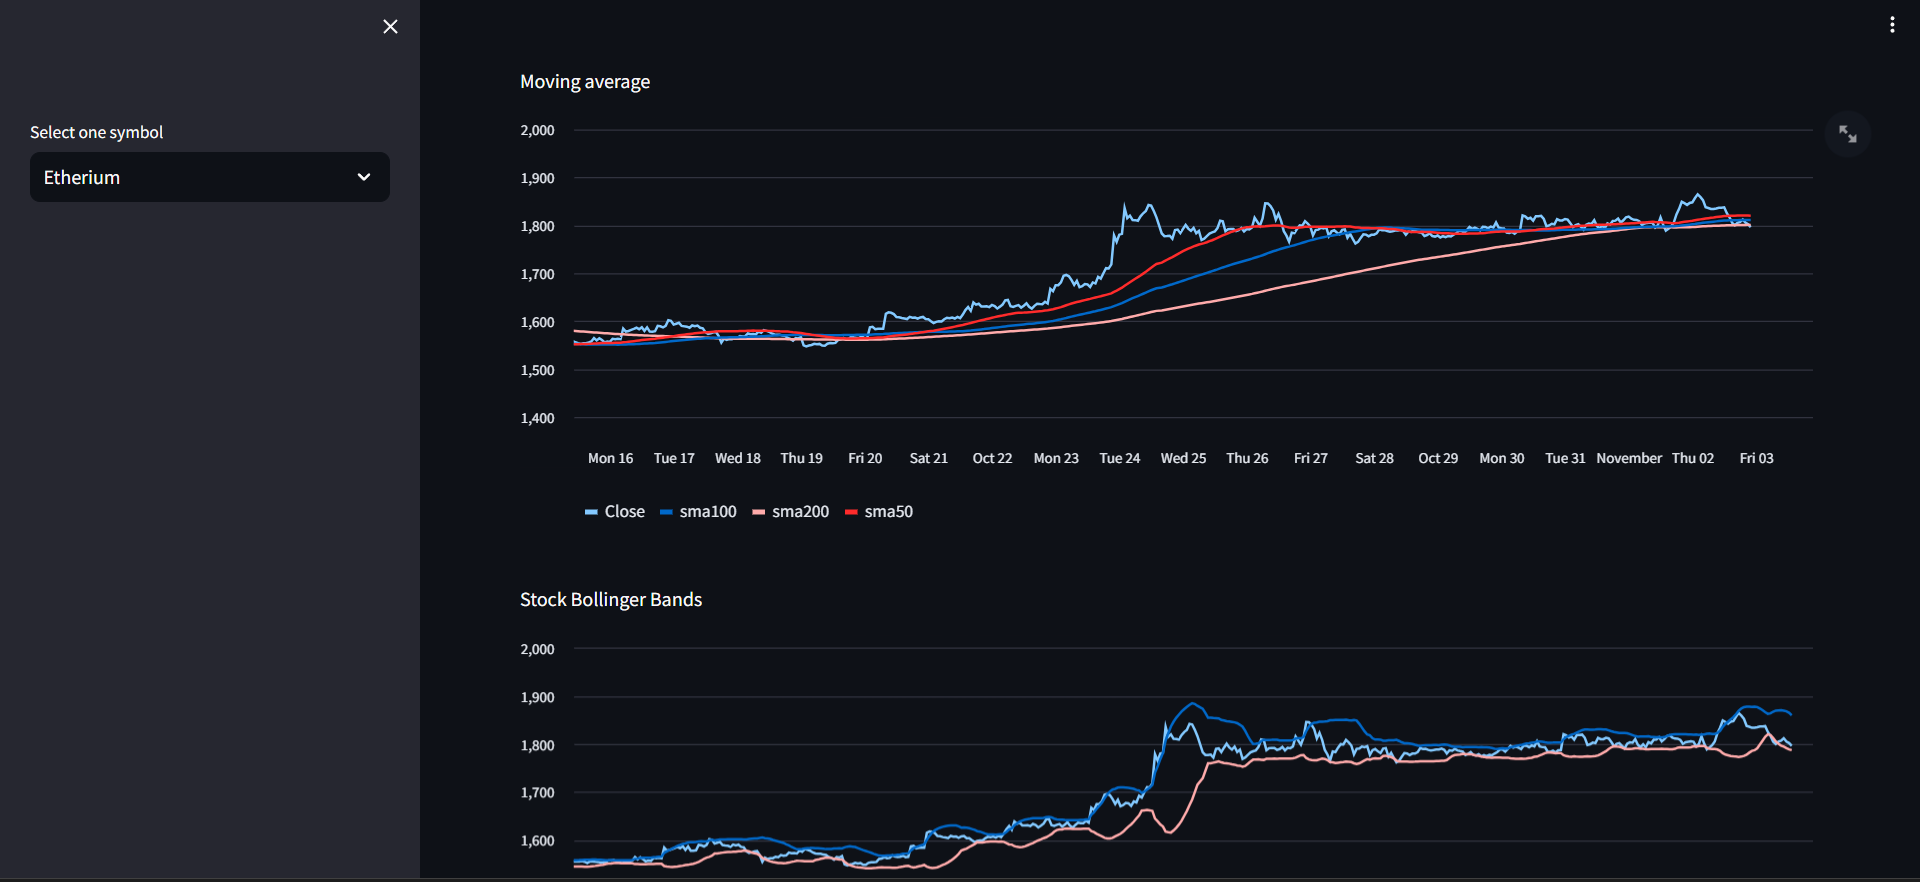

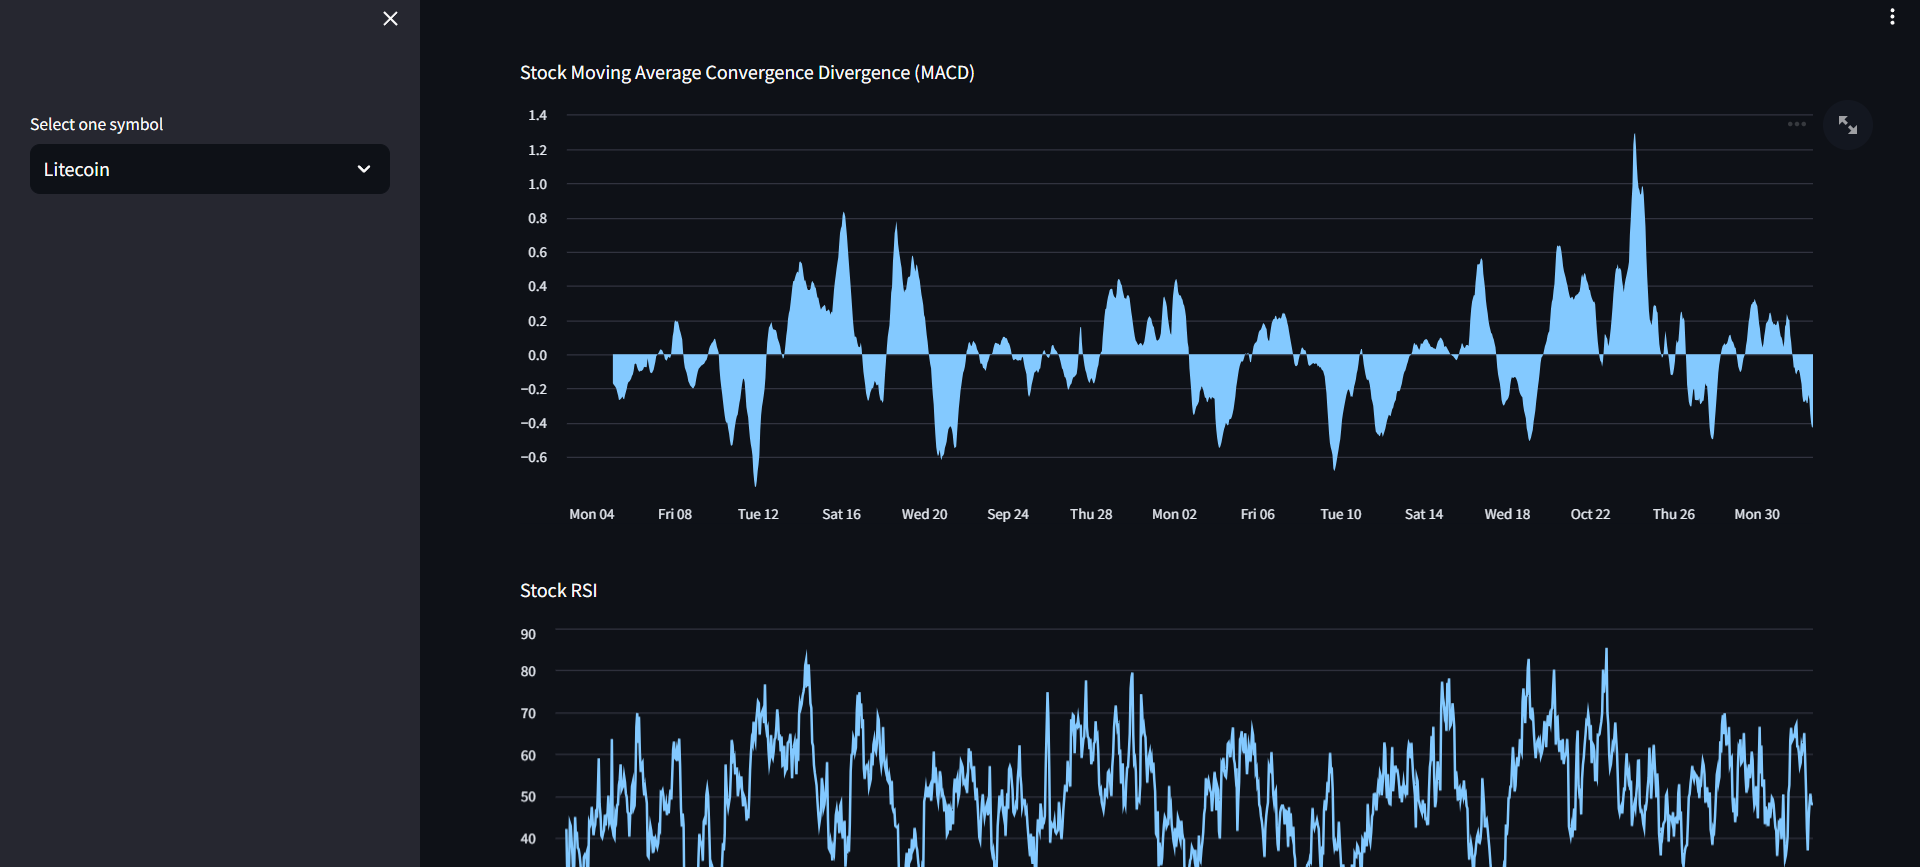

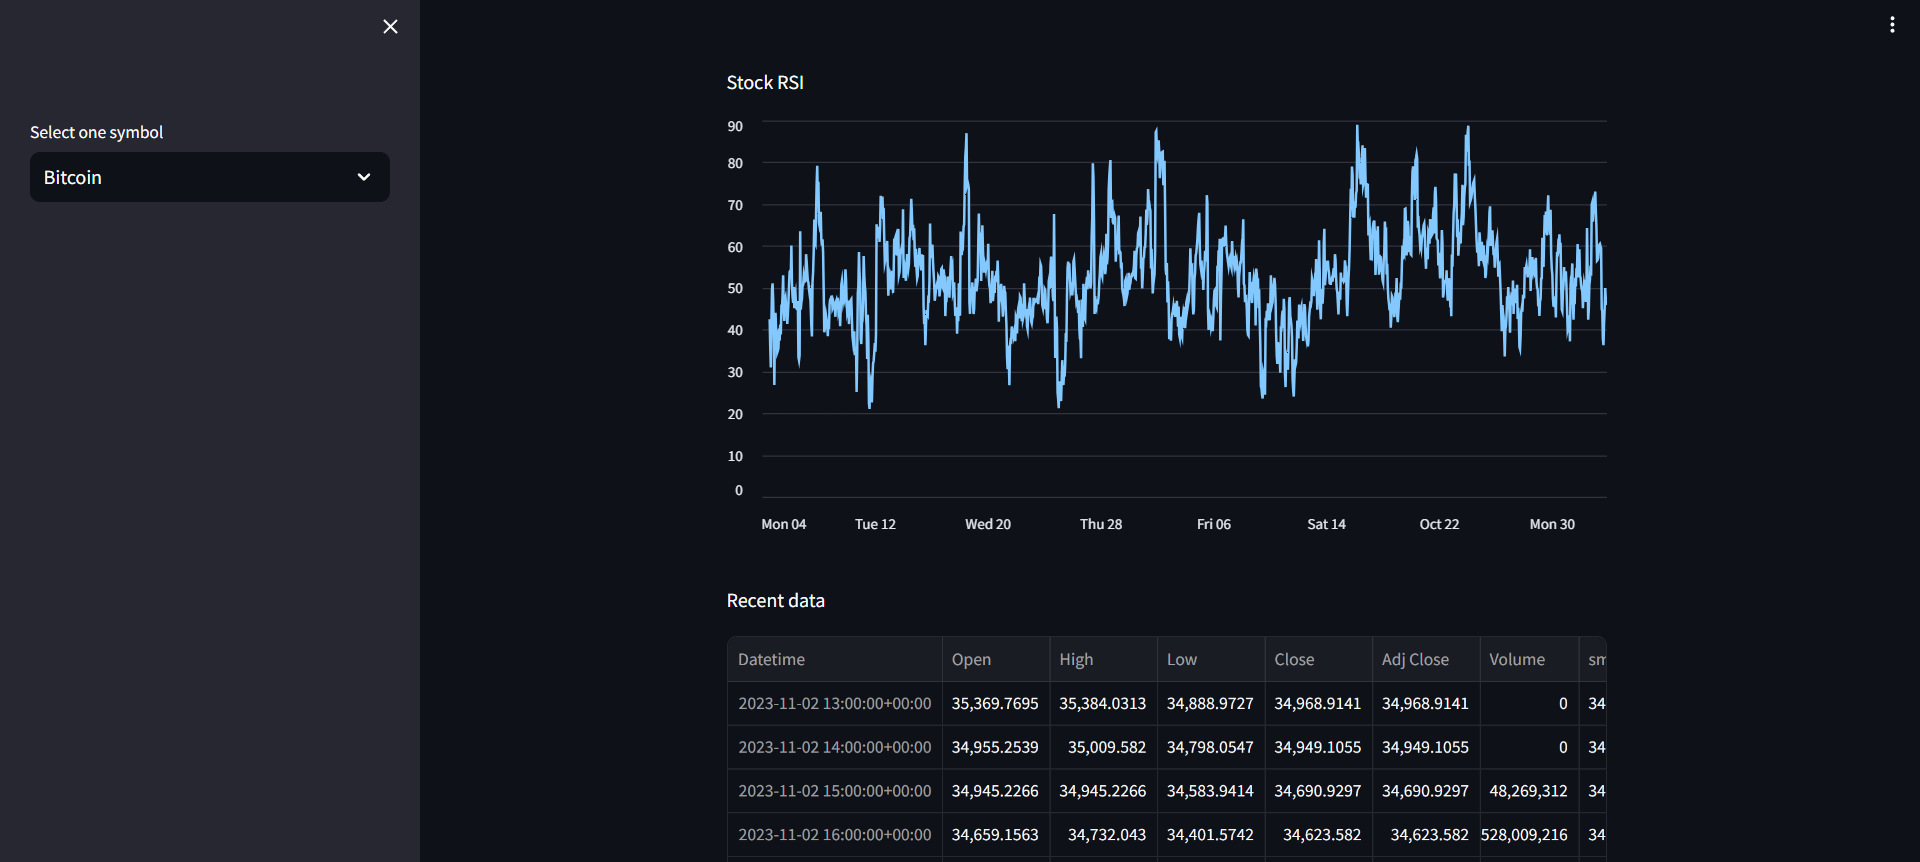